In [23]:
##!pip install torch
import torch
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
##!pip install torchvision
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random as r

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

Train_Set = torchvision.datasets.MNIST(r'C:\Users\samev\OneDrive\Coding\Machine Learning\Handwriting_Recognition', download=True, transform=transform, train=True)
Train_data_loader = torch.utils.data.DataLoader(Train_Set,batch_size=64,shuffle=True)

Test_Set = torchvision.datasets.MNIST(r'C:\Users\samev\OneDrive\Coding\Machine Learning\Handwriting_Recognition', download=True, transform=transform, train=False)
Train_data_loader = torch.utils.data.DataLoader(Train_Set,batch_size=64,shuffle=True)


In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        
        # 1. Input Layer Decision:
        # Each MNIST image is 28x28 pixels, which we flatten into 784 features.
        # We map these 784 features to a hidden layer.
        self.fc1 = nn.Linear(784, 128)  # 784 input features to 128 neurons.
        # Choosing 128 neurons is a common starting point for balancing model capacity and training speed.
        
        # 2. Hidden Layer(s):
        # We add a second hidden layer to allow the network to learn more complex patterns.
        self.fc2 = nn.Linear(128, 64)  # Reducing dimensionality from 128 to 64 neurons.
        # This reduction helps the model learn hierarchical representations.
        
        # 3. Output Layer:
        # The task is to classify images into 10 classes (digits 0-9).
        # Therefore, the output layer has 10 neurons.
        self.fc3 = nn.Linear(64, 10)  # Mapping 64 features to 10 output classes.

    def forward(self, x):
        # 4. Flattening:
        # The input x comes in shape [batch_size, 1, 28, 28]. We flatten it to [batch_size, 784].
        x = x.view(x.size(0), -1)
        
        # 5. First Hidden Layer + Activation:
        # Applying a linear transformation followed by ReLU activation introduces non-linearity.
        x = F.relu(self.fc1(x))
        
        # 6. Second Hidden Layer + Activation:
        # Again, we transform the data and apply ReLU.
        x = F.relu(self.fc2(x))
        
        # 7. Output Layer:
        # The final linear layer outputs raw scores (logits) for each of the 10 classes.
        # We typically apply softmax later (or incorporate it in the loss function, like with CrossEntropyLoss).
        x = self.fc3(x)
        return x

In [8]:
model = SimpleNN()

# Define the loss function. CrossEntropyLoss is appropriate for multi-class classification.
criterion = nn.CrossEntropyLoss()

# Choose an optimizer (Adam in this case) to update model weights.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Step 3: Train the Model
# ------------------------------

num_epochs = 5  # You can adjust this based on your needs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Iterate over the training DataLoader
    for images, labels in Train_data_loader:
        # Zero the parameter gradients to avoid accumulating them
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model.
        outputs = model(images)

        # Compute the loss between predicted outputs and actual labels.
        loss = criterion(outputs, labels)

        # Backward pass: compute gradient of the loss with respect to model parameters.
        loss.backward()

        # Update model parameters using the gradients.
        optimizer.step()

        running_loss += loss.item()

In [41]:
def predict():
    index = r.randint(0, len(Test_Set)-1)
    sample_img, sample_label = Test_Set[index]
    image_np = sample_img.numpy().squeeze()
    plt.imshow(image_np, cmap="gray")  # Use 'gray' colormap for grayscale images
    
    plt.axis("off")  # Hide axis for better visualization
    
    
    
    # The model expects a batch dimension, so we add one using unsqueeze.
    sample_img = sample_img.unsqueeze(0)  # Shape: [1, 1, 28, 28]
    
    # Make a prediction
    model.eval()  
    with torch.no_grad():
        output = model(sample_img)
        # Get the predicted class (digit) by finding the index with the highest output score.
        _, predicted_label = torch.max(output, 1)
    
    print(f"Predicted: {predicted_label.item()}, Actual: {sample_label}")
    plt.title(f"Actual: {sample_label}, Predicted: {predicted_label.item()}")
    plt.show()

Predicted: 0, Actual: 0


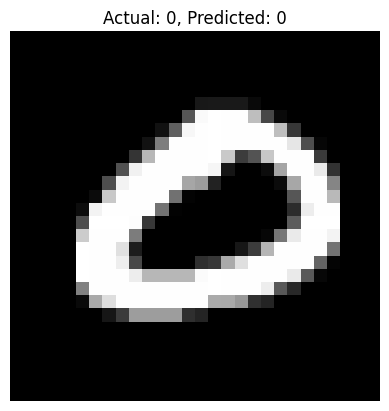

In [50]:
predict()